In [5]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
path_datasets = "datasets/"
root_path = "telefonica/shared/"

In [8]:
all_files = glob(path_datasets + "[0-9]*/" + root_path + "*.CSV")
all_files

['datasets/20190311/telefonica/shared/filtered_Lst_Usos_20190305_20190307.CSV',
 'datasets/20190311/telefonica/shared/filtered_Lst_Usos_20190303_20190305.CSV',
 'datasets/20190311/telefonica/shared/filtered_Lst_Usos_20190302_20190304.CSV',
 'datasets/20190311/telefonica/shared/filtered_Lst_Usos_20190306_20190308.CSV',
 'datasets/20190311/telefonica/shared/filtered_Lst_Usos_20190304_20190306.CSV',
 'datasets/20190311/telefonica/shared/filtered_Lst_Usos_20190307_20190309.CSV',
 'datasets/20190330/telefonica/shared/filtered_Lst_Usos_20190326_20190328.CSV',
 'datasets/20190330/telefonica/shared/filtered_Lst_Usos_20190325_20190327.CSV',
 'datasets/20190330/telefonica/shared/filtered_Lst_Usos_20190324_20190326.CSV',
 'datasets/20190330/telefonica/shared/filtered_Lst_Usos_20190321_20190323.CSV',
 'datasets/20190330/telefonica/shared/filtered_Lst_Usos_20190323_20190325.CSV',
 'datasets/20190330/telefonica/shared/filtered_Lst_Usos_20190322_20190324.CSV']

In [5]:
dtype = {
    'CODIGOENTIDAD': 'category',
    'NOMBREENTIDAD': 'category',
    'CODIGOSITIO': 'category',
    'NOMBRESITIO': 'category',
    'NROTARJETA': 'category'
}

## With `pandas`

In [6]:
%%time
df = (pd.read_csv(f, sep=";", encoding="cp1252", usecols=[i for i in range(6)], dtype=dtype) for f in all_files)
df = pd.concat(df, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54583158 entries, 0 to 54583157
Data columns (total 6 columns):
FECHAHORATRX     object
CODIGOENTIDAD    category
NOMBREENTIDAD    category
CODIGOSITIO      object
NOMBRESITIO      object
NROTARJETA       object
dtypes: category(2), object(4)
memory usage: 1.7+ GB
CPU times: user 6min 59s, sys: 14.6 s, total: 7min 13s
Wall time: 7min 15s


In [7]:
%%time
df["FECHAHORATRX"] = pd.to_datetime(df["FECHAHORATRX"], format="%d/%m/%Y %H:%M:%S", errors='coerce')
df.set_index("FECHAHORATRX", inplace=True)

CPU times: user 2min 43s, sys: 1.58 s, total: 2min 45s
Wall time: 2min 45s


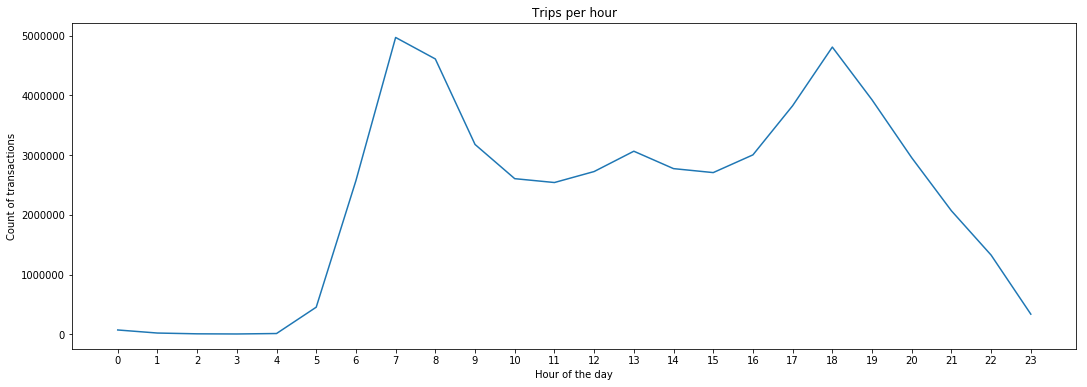

In [9]:
hour_count = df.groupby(df.index.hour).count()['CODIGOENTIDAD']
_ = plt.figure(figsize=(18, 6))
_ = plt.plot(hour_count)
_ = plt.title("Trips per hour")
_ = plt.xlabel('Hour of the day')
_ = plt.ylabel('Count of transactions')
_ = plt.xticks(hour_count.index, hour_count.index)

In [29]:
df.groupby(df.index.date).count()

,CODIGOENTIDAD,NOMBREENTIDAD,CODIGOSITIO,NOMBRESITIO,NROTARJETA
2018-09-01,14,14,14,14,14
2019-01-17,4,4,4,4,4
2019-01-28,208,208,208,208,208
2019-01-29,58,58,58,58,58
2019-01-30,77,77,77,77,77
2019-01-31,54,54,54,54,54
2019-02-01,79,79,79,79,79
2019-02-02,5,5,5,5,5
2019-02-03,30,30,30,30,30
2019-02-06,42,42,42,42,42


CPU times: user 43.8 s, sys: 7.52 s, total: 51.3 s
Wall time: 1min 1s


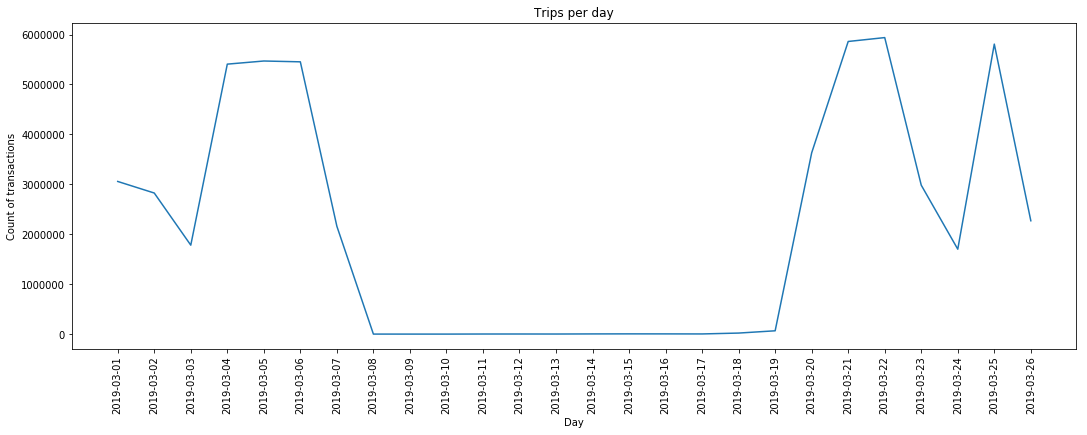

In [16]:
%%time
dates_count = df["2019-03"].groupby(df["2019-03"].index.date).count()['CODIGOENTIDAD']
_ = plt.figure(figsize=(18, 6))
_ = plt.plot(dates_count)
_ = plt.title("Trips per day")
_ = plt.xlabel('Day')
_ = plt.ylabel('Count of transactions')
_ = plt.xticks(dates_count.index, dates_count.index, rotation=90)

## With `pyspark`

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import Row, StructField, StructType, StringType, IntegerType, TimestampType
from pyspark.sql.functions import col, udf, hour, to_timestamp
from datetime import datetime

In [3]:
conf = SparkConf().setMaster("local[4]").setAppName("transport")
sc = SparkContext(conf=conf)

In [4]:
sqlContext = SQLContext(sc)
sqlContext

In [18]:
%%time
df = sqlContext.read.csv(path=all_files, header=True, sep=';', encoding="cp1252")
type(df)

CPU times: user 5.94 ms, sys: 0 ns, total: 5.94 ms
Wall time: 172 ms


In [19]:
df = df.drop('_c6')
df.printSchema()

root
 |-- FECHAHORATRX: string (nullable = true)
 |-- CODIGOENTIDAD: string (nullable = true)
 |-- NOMBREENTIDAD: string (nullable = true)
 |-- CODIGOSITIO: string (nullable = true)
 |-- NOMBRESITIO: string (nullable = true)
 |-- NROTARJETA: string (nullable = true)



In [20]:
%%time
df.count()

CPU times: user 2.58 ms, sys: 0 ns, total: 2.58 ms
Wall time: 12.8 s


54583158

In [12]:
df.show()

+-------------------+-------------+------------------+-----------+-----------+--------------------+
|       FECHAHORATRX|CODIGOENTIDAD|     NOMBREENTIDAD|CODIGOSITIO|NOMBRESITIO|          NROTARJETA|
+-------------------+-------------+------------------+-----------+-----------+--------------------+
|01/03/2019 00:02:40|           16|         U3 - Vule|      15065|    BJFT-91|87b432e59e18c8f4a...|
|01/03/2019 00:07:19|            5|U5 - Metropolitana|      14243|    BJFH-23|7878d84c3be9ef45b...|
|01/03/2019 00:07:26|            5|U5 - Metropolitana|      14243|    BJFH-23|c5e05fad6e3e25a21...|
|01/03/2019 00:08:33|           16|         U3 - Vule|      15065|    BJFT-91|c41067a66df51bde8...|
|01/03/2019 00:17:00|            5|U5 - Metropolitana|      14243|    BJFH-23|f1afa35f3b2f77460...|
|01/03/2019 00:17:02|            5|U5 - Metropolitana|      14243|    BJFH-23|7719c518903edadf1...|
|01/03/2019 00:23:23|            5|U5 - Metropolitana|      14243|    BJFH-23|e1abefb4651d01553...|


In [13]:
df.groupby('CODIGOENTIDAD').count().show()

+-------------+--------+
|CODIGOENTIDAD|   count|
+-------------+--------+
|           16| 6115833|
|            5| 6535914|
|           17|  732051|
|            9| 2670049|
|            1|24969163|
|            4| 5942283|
|           13| 3281896|
|            2| 4335969|
+-------------+--------+



In [14]:
%%time
df.groupby('NOMBREENTIDAD').count().show()

+------------------+--------+
|     NOMBREENTIDAD|   count|
+------------------+--------+
|       U2 - Su Bus| 4335969|
|          U7 - STP| 2670049|
|        METRO - OT|24969163|
|      Tren Central|  732051|
|       U6 - Redbus| 3281896|
|         U3 - Vule| 6115833|
|      U4 - Express| 5942283|
|U5 - Metropolitana| 6535914|
+------------------+--------+

CPU times: user 6.27 ms, sys: 689 µs, total: 6.96 ms
Wall time: 39.2 s


In [15]:
convert_date =  udf(lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M:%S"), TimestampType())
df = df.withColumn('date_time', convert_date(col('FECHAHORATRX'))).drop("FECHAHORATRX")

In [19]:
df.printSchema()

root
 |-- CODIGOENTIDAD: string (nullable = true)
 |-- NOMBREENTIDAD: string (nullable = true)
 |-- CODIGOSITIO: string (nullable = true)
 |-- NOMBRESITIO: string (nullable = true)
 |-- NROTARJETA: string (nullable = true)
 |-- date_time: timestamp (nullable = true)



In [16]:
df.select(df["date_time"]).show(5)

+-------------------+
|          date_time|
+-------------------+
|2019-03-01 00:02:40|
|2019-03-01 00:07:19|
|2019-03-01 00:07:26|
|2019-03-01 00:08:33|
|2019-03-01 00:17:00|
+-------------------+
only showing top 5 rows



In [18]:
df.groupBy(hour("date_time")).agg({"date_time": "count"}).show()

+---------------+----------------+
|hour(date_time)|count(date_time)|
+---------------+----------------+
|             12|         2725040|
|             22|         1326820|
|              1|           22849|
|             13|         3065000|
|              6|         2572870|
|             16|         3004000|
|              3|            7221|
|             20|         2955978|
|              5|          455469|
|             19|         3924819|
|             15|         2707414|
|              9|         3178443|
|             17|         3826108|
|              4|           14748|
|              8|         4608828|
|             23|          338691|
|              7|         4968339|
|             10|         2605778|
|             21|         2068354|
|             11|         2541260|
+---------------+----------------+
only showing top 20 rows



In [15]:
df = df.withColumn('date_time', to_timestamp(df["FECHAHORATRX"])).drop("FECHAHORATRX")

In [31]:
df = df.withColumn('date_time', to_timestamp(df["FECHAHORATRX"], format="dd/MM/yyyy HH:mm:ss")).drop("FECHAHORATRX")

In [32]:
hou
df.show()

+-------------+------------------+-----------+-----------+--------------------+-------------------+
|CODIGOENTIDAD|     NOMBREENTIDAD|CODIGOSITIO|NOMBRESITIO|          NROTARJETA|          date_time|
+-------------+------------------+-----------+-----------+--------------------+-------------------+
|           16|         U3 - Vule|      15065|    BJFT-91|87b432e59e18c8f4a...|2019-03-01 00:02:40|
|            5|U5 - Metropolitana|      14243|    BJFH-23|7878d84c3be9ef45b...|2019-03-01 00:07:19|
|            5|U5 - Metropolitana|      14243|    BJFH-23|c5e05fad6e3e25a21...|2019-03-01 00:07:26|
|           16|         U3 - Vule|      15065|    BJFT-91|c41067a66df51bde8...|2019-03-01 00:08:33|
|            5|U5 - Metropolitana|      14243|    BJFH-23|f1afa35f3b2f77460...|2019-03-01 00:17:00|
|            5|U5 - Metropolitana|      14243|    BJFH-23|7719c518903edadf1...|2019-03-01 00:17:02|
|            5|U5 - Metropolitana|      14243|    BJFH-23|e1abefb4651d01553...|2019-03-01 00:23:23|


In [36]:
%%time
hours = df.groupBy(hour("date_time")).agg({"date_time": "count"}).toPandas()

CPU times: user 15.5 ms, sys: 2.26 ms, total: 17.7 ms
Wall time: 1min 9s


In [38]:
hours.rename(columns={"hour(date_time)": "hour", "count(date_time)": "count"}, inplace=True)

In [39]:
hours

,hour,count
0,12,2725040
1,22,1326820
2,1,22849
3,13,3065000
4,6,2572870
5,16,3004000
6,3,7221
7,20,2955978
8,5,455469
9,19,3924819


In [42]:
hours.sort_values("hour", inplace=True)

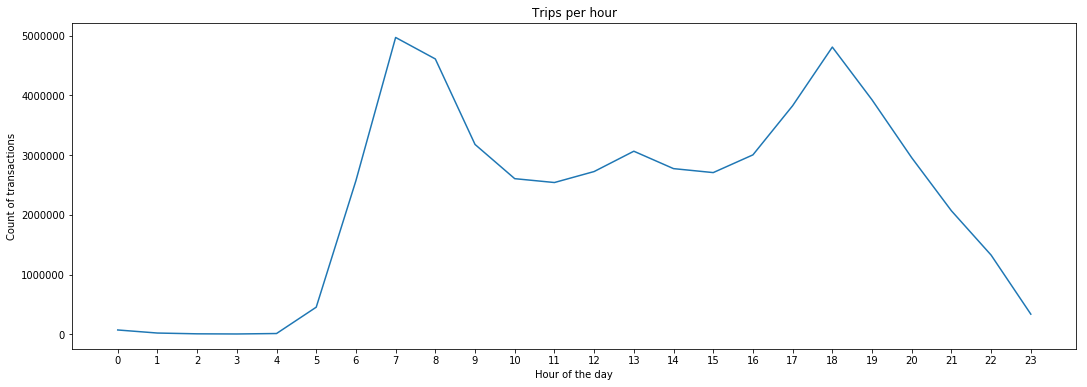

In [44]:
_ = plt.figure(figsize=(18, 6))
_ = plt.plot(hours['hour'], hours['count'])
_ = plt.title("Trips per hour")
_ = plt.xlabel('Hour of the day')
_ = plt.ylabel('Count of transactions')
_ = plt.xticks(hours['hour'], hours['hour'])